In [91]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [92]:
url = 'D:/datasets/Breast_Cancer.csv'
df = pd.read_csv(url)

In [93]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [94]:
X = df.iloc[:,2:].values
Y = df.iloc[:, 1].values

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size =.2, random_state=4)

In [95]:
X_test

array([[1.442e+01, 1.654e+01, 9.415e+01, ..., 1.414e-01, 3.053e-01,
        8.764e-02],
       [1.205e+01, 2.272e+01, 7.875e+01, ..., 1.092e-01, 2.191e-01,
        9.349e-02],
       [1.953e+01, 1.890e+01, 1.295e+02, ..., 1.980e-01, 2.968e-01,
        9.929e-02],
       ...,
       [1.108e+01, 1.883e+01, 7.330e+01, ..., 2.524e-01, 4.154e-01,
        1.403e-01],
       [1.626e+01, 2.188e+01, 1.075e+02, ..., 1.047e-01, 2.736e-01,
        7.953e-02],
       [1.167e+01, 2.002e+01, 7.521e+01, ..., 8.120e-02, 3.206e-01,
        8.950e-02]])

In [96]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

X_train

array([[-0.87737439, -0.99632936, -0.84836506, ..., -0.11026997,
         0.63086499,  0.39596053],
       [ 0.23276443, -0.39373657,  0.19955174, ...,  0.79850777,
         0.81341746, -0.68247993],
       [ 0.20707998, -0.53919   ,  0.11856132, ..., -0.53687358,
        -0.62276969, -0.8610112 ],
       ...,
       [-0.03264151, -0.83471443, -0.10044337, ..., -0.49926369,
        -1.25120254, -0.92628669],
       [-0.99152748, -0.95246245, -1.01365162, ..., -1.76049983,
        -0.3239006 , -1.23090567],
       [ 2.8868238 ,  0.21347378,  3.06520748, ...,  1.69039945,
         0.50323981, -0.20156131]])

In [97]:
#LOGISTIC REGRESSION
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)
y_pred = LogReg.predict(X_test)
print(y_pred)

confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))

['B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'M' 'B']
[[76  4]
 [ 0 34]]
              precision    recall  f1-score   support

           B       1.00      0.95      0.97        80
           M       0.89      1.00      0.94        34

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [98]:
cm = pd.DataFrame(confusion_matrix)

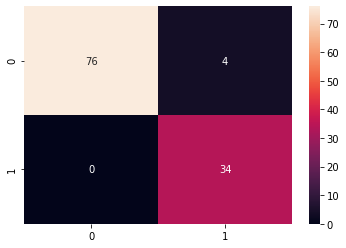

In [99]:
sb.heatmap(cm, annot=True, fmt = "d")

In [101]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

y_predict = classifier.predict(X_test)
print(y_predict)

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix=confusion_matrix(Y_test,y_predict)
print(confusion_matrix)
print(classification_report(Y_test,y_predict))

['B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B']
[[78  2]
 [ 2 32]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        80
           M       0.94      0.94      0.94        34

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [105]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion= "entropy", random_state=100, min_samples_leaf=5)
clf_entropy.fit(X_train,Y_train)

y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy_score(Y_test, y_pred_en)

confusion_matrix = confusion_matrix(Y_test, y_pred_en)
print(confusion_matrix)
print(classification_report(Y_test,y_pred_en))

['B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B']
[[68 12]
 [ 1 33]]
              precision    recall  f1-score   support

           B       0.99      0.85      0.91        80
           M       0.73      0.97      0.84        34

    accuracy                           0.89       114
   macro avg       0.86      0.91      0.87       114
weighted avg       0.91      0.89      0.89       114



In [106]:
cm = pd.DataFrame(confusion_matrix)

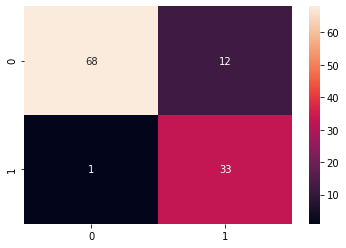

In [107]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(cm,annot=True,fmt="d")

In [110]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

pred = dt.predict(X_test)
pred

dt.score(X_test,Y_test)

0.9122807017543859

In [111]:
dt.score(X_train,Y_train)

1.0

In [115]:
#RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 10)

rf.fit(X_train,Y_train)

pre = rf.predict(X_test)
pre

rf.score(X_test,Y_test)

0.9210526315789473